# Steps
### 1. Scrape the Data
### 2. Data Cleaning
### 3. Convert your data into DataFrame
### 4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
### 5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB
## Link: https://sofifa.com/players

## Q1. Give the logic to print the URL for all the 10 pages

In [1]:
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

# Here we extract the link of the first 10 pages from sofifa.com/players to perform EDA.

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Begining 

In [2]:
# Import all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #RegEx
from bs4 import BeautifulSoup # Will be used for web scrapping
import requests # requests will allow you to send HTTP/1.1 requests using Python.

In [3]:
url = 'https://sofifa.com/players?offset=0'
# Here we take the URl of the first page of sofifa to check if we can scrape the data or not

In [4]:
req = requests.get(url)
# here get() method sends a GET request to the specified url.

In [5]:
req.status_code
# Status code 200 means the site is up and running

200

In [19]:
soup = BeautifulSoup(req.content) # The variable soup now holds the contents of the page in the form of a string

In [20]:
soup.prettify() # Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Nov 16, 2022 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Nov 16, 2022" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2022 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" r

In [21]:
arr = [i for i in soup.findAll('tr')] # Puts all individual <tr></tr> tags in an array 

In [22]:
arr[0]

<tr class="persist-header">
<th class="col-avatar"></th>
<th class="col-name text-left">Name</th><th aria-label="Age" class="col col-ae" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=ae&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Age</a></th><th aria-label="Overall Rating" class="col col-oa" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=oa&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>OVA</a></th><th aria-label="Potential" class="col col-pt" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=pt&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>POT</a></th><th aria-label="Team &amp; Contract" class="col-name text-left" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=tm&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Team &amp; Contract</a></th>
<th aria-label="Value" class="col col-vl" data-

In [23]:
del arr[0]

In [24]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/252/371/23_60.png" data-srcset="https://cdn.sofifa.net/players/252/371/23_120.png 2x, https://cdn.sofifa.net/players/252/371/23_180.png 3x" data-type="player" id="252371" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Jude Bellingham" data-tip-pos="top" href="/player/252371/jude-bellingham/230006/" role="tooltip"><div class="ellipsis">J. Bellingham</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/gb-eng.png" data-srcset="https://cdn.sofifa.net/flags/gb-eng@2x.png 2x, https://cdn.sofifa.net/flags/gb-eng@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="England" width="21"/> <a href="/players?pn=14" rel="nofollow"><span class="pos pos14">CM</span>

In [12]:
# using RegEx to extract the image link for each player
re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/252/371/23_120.png'

In [13]:
arr[0].find('a', {"role":"tooltip"})

<a aria-label="Jude Bellingham" data-tip-pos="top" href="/player/252371/jude-bellingham/230006/" role="tooltip"><div class="ellipsis">J. Bellingham</div></a>

In [14]:
# Extracting Name using RegEx
re.sub('^<a.*">|<.*>', '', str(arr[0].find('a', {"role":"tooltip"})))

'J. Bellingham'

In [15]:
# Age
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col"})))

'19'

In [16]:
# OVA
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-oa"})))

'84'

In [17]:
# POT
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-pt"})))

'91'

In [74]:
# Team
re.sub('<a.*">|<.*>', '', str(arr[0].findAll('a')[-1]))

'Birmingham City'

In [75]:
# Duration
re.sub('<div.*\n|<.*>', '', str(arr[0].find('div', {"class": "sub"})))

'2022 ~ 2025'

In [76]:
# Value
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-vl"})))

'625K'

In [77]:
# Wage
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-wg"})))

'700'

In [78]:
# Total Stats
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class": "col col-tt"})))

'1570'

## Making Columns to scrape the data and store it in a dataset

In [79]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM','DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [80]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]

    for i in soup.findAll('tr'):
      Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
      Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
      OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
      POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
      Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
      Value = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-vl"})))
      Wage = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-wg"})))
      Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


      lists[0].append(Image_Link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = pd.concat([fifa_final,fifa], ignore_index=True)

In [81]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570
1,https://cdn.sofifa.net/players/134/744/23_120.png,A. Hutchinson,39,72,72,Beşiktaş JK,2013 ~ 2023,750K,22K,1945
2,https://cdn.sofifa.net/players/237/681/23_120.png,T. Kubo,21,74,84,Real Sociedad,2022 ~ 2027,9.5M,19K,1805
3,https://cdn.sofifa.net/players/190/286/23_120.png,Canales,31,84,84,Real Betis Balompié,2018 ~ 2026,35M,42K,2217
4,https://cdn.sofifa.net/players/241/486/23_120.png,J. Koundé,23,84,89,FC Barcelona,2022 ~ 2027,57.5M,150K,1926


In [82]:
fifa_final.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
590,https://cdn.sofifa.net/players/263/578/23_120.png,Balde,18,73,83,FC Barcelona,2021 ~ 2024,6M,22K,1788
591,https://cdn.sofifa.net/players/264/044/23_120.png,M. Viti,20,72,81,OGC Nice,2022 ~ 2025,4.8M,18K,1612
592,https://cdn.sofifa.net/players/264/453/23_120.png,M. van de Ven,21,71,85,VfL Wolfsburg,2021 ~ 2025,4.3M,17K,1722
593,https://cdn.sofifa.net/players/265/526/23_120.png,G. Restes,17,60,80,Toulouse Football Club,2021 ~ 2024,600K,500,943
594,https://cdn.sofifa.net/players/265/800/23_120.png,Jutglà,23,74,80,Club Brugge KV,2022 ~ 2026,6.5M,21K,1844
595,https://cdn.sofifa.net/players/266/866/23_120.png,Éderson,22,74,80,Atalanta,2022 ~ 2026,6.5M,32K,1931
596,https://cdn.sofifa.net/players/268/776/23_120.png,H. Ahmed,22,68,75,,Free,0,0,1700
597,https://cdn.sofifa.net/players/269/763/23_120.png,D. Rojas,26,82,83,AFC Richmond,2019 ~ 2024,36.5M,74K,2033
598,https://cdn.sofifa.net/players/270/141/23_120.png,F. Israel,22,69,81,Sporting CP,2022 ~ 2027,3M,4K,984
599,https://cdn.sofifa.net/players/270/465/23_120.png,B. Bouanani,17,65,80,OGC Nice,2022 ~ 2027,1.6M,1K,1616


In [83]:
fifa_final.columns # All the columns of the fifa dataset

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [84]:
len(fifa_final) # Number of entries in the final dataset

600

In [85]:
len(fifa_final.columns) # Total Columns in the final dataset

10

In [86]:
fifa_final.info() # Some general info about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [87]:
fifa_final.describe() # Some statistical information about our dataset

,Age,OVA,POT,Total_stats
count,600.000000,600.000000,600.000000,600.000000
mean,24.645000,76.505000,82.246667,1864.903333
std,5.062446,6.290941,4.515137,240.329005
min,16.000000,58.000000,63.000000,925.000000
25%,21.000000,72.000000,80.000000,1736.750000
50%,24.000000,77.000000,83.000000,1897.000000
75%,27.000000,81.000000,85.000000,2033.250000
max,43.000000,91.000000,95.000000,2283.000000


# From here on we check for impurties in our dataset and correct them

In [88]:
# How many null values are there in each column?
fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [89]:
# How many null values are there in a dataset?
fifa_final.isna().sum().sum()

0

In [90]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()

22

In [91]:
fifa_final.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [92]:
# Show all duplicated values
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
61,https://cdn.sofifa.net/players/234/906/23_120.png,H. Aouar,24,79,84,Olympique Lyonnais,2016 ~ 2023,26.5M,57K,2073
135,https://cdn.sofifa.net/players/260/926/23_120.png,K. Schade,20,70,83,Sport-Club Freiburg,2021 ~ 2026,3.8M,11K,1674
205,https://cdn.sofifa.net/players/242/187/23_120.png,C. Baumgartner,22,78,84,TSG Hoffenheim,2018 ~ 2025,22.5M,32K,1917
246,https://cdn.sofifa.net/players/192/387/23_120.png,C. Immobile,32,86,86,Lazio,2016 ~ 2025,55M,100K,2060
303,https://cdn.sofifa.net/players/162/835/23_120.png,S. Handanovič,37,83,83,Inter,2012 ~ 2023,4M,42K,1259
396,https://cdn.sofifa.net/players/223/848/23_120.png,S. Milinković-Savić,27,86,87,Lazio,2015 ~ 2024,77.5M,90K,2250
414,https://cdn.sofifa.net/players/237/221/23_120.png,J. Foyth,24,79,84,Villarreal CF,2021 ~ 2026,24.5M,29K,1929
421,https://cdn.sofifa.net/players/138/956/23_120.png,G. Chiellini,37,84,84,Los Angeles FC,2022 ~ 2023,7.5M,11K,1815
422,https://cdn.sofifa.net/players/139/068/23_120.png,Nani,35,77,77,Melbourne Victory,2022 ~ 2024,4.3M,9K,1927
523,https://cdn.sofifa.net/players/235/036/23_120.png,W. Faes,24,77,82,Leicester City,2022 ~ 2027,14.5M,56K,1661


In [93]:
# Delete all the duplicated values
fifa_final.drop_duplicates(inplace=True)

In [94]:
# Checking if duplicate values still exist
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats


In [95]:
fifa_final.duplicated().sum()

0

In [96]:
# The final dataset shape after removing duplicates
fifa_final.shape

(578, 10)

In [97]:
# Here we notice that even thought the duplicates values are gone, the dataset hasnt been re-indexed
fifa_final.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
595,https://cdn.sofifa.net/players/266/866/23_120.png,Éderson,22,74,80,Atalanta,2022 ~ 2026,6.5M,32K,1931
596,https://cdn.sofifa.net/players/268/776/23_120.png,H. Ahmed,22,68,75,,Free,0,0,1700
597,https://cdn.sofifa.net/players/269/763/23_120.png,D. Rojas,26,82,83,AFC Richmond,2019 ~ 2024,36.5M,74K,2033
598,https://cdn.sofifa.net/players/270/141/23_120.png,F. Israel,22,69,81,Sporting CP,2022 ~ 2027,3M,4K,984
599,https://cdn.sofifa.net/players/270/465/23_120.png,B. Bouanani,17,65,80,OGC Nice,2022 ~ 2027,1.6M,1K,1616


In [98]:
# Re-indexing the dataset
fifa_final.reset_index(inplace=True)

In [99]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
573,595,https://cdn.sofifa.net/players/266/866/23_120.png,Éderson,22,74,80,Atalanta,2022 ~ 2026,6.5M,32K,1931
574,596,https://cdn.sofifa.net/players/268/776/23_120.png,H. Ahmed,22,68,75,,Free,0,0,1700
575,597,https://cdn.sofifa.net/players/269/763/23_120.png,D. Rojas,26,82,83,AFC Richmond,2019 ~ 2024,36.5M,74K,2033
576,598,https://cdn.sofifa.net/players/270/141/23_120.png,F. Israel,22,69,81,Sporting CP,2022 ~ 2027,3M,4K,984
577,599,https://cdn.sofifa.net/players/270/465/23_120.png,B. Bouanani,17,65,80,OGC Nice,2022 ~ 2027,1.6M,1K,1616


In [100]:
fifa_final.head()
# here we notice that we have an unnecesary column for index, despite already having an index which is assigned by pandas itself

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,0,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570
1,1,https://cdn.sofifa.net/players/134/744/23_120.png,A. Hutchinson,39,72,72,Beşiktaş JK,2013 ~ 2023,750K,22K,1945
2,2,https://cdn.sofifa.net/players/237/681/23_120.png,T. Kubo,21,74,84,Real Sociedad,2022 ~ 2027,9.5M,19K,1805
3,3,https://cdn.sofifa.net/players/190/286/23_120.png,Canales,31,84,84,Real Betis Balompié,2018 ~ 2026,35M,42K,2217
4,4,https://cdn.sofifa.net/players/241/486/23_120.png,J. Koundé,23,84,89,FC Barcelona,2022 ~ 2027,57.5M,150K,1926


In [101]:
# Delete the column - index
fifa_final.drop(['index'], axis=1, inplace=True)

In [102]:
fifa_final.head()
# Hence, we dont have the index columns anymore 

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570
1,https://cdn.sofifa.net/players/134/744/23_120.png,A. Hutchinson,39,72,72,Beşiktaş JK,2013 ~ 2023,750K,22K,1945
2,https://cdn.sofifa.net/players/237/681/23_120.png,T. Kubo,21,74,84,Real Sociedad,2022 ~ 2027,9.5M,19K,1805
3,https://cdn.sofifa.net/players/190/286/23_120.png,Canales,31,84,84,Real Betis Balompié,2018 ~ 2026,35M,42K,2217
4,https://cdn.sofifa.net/players/241/486/23_120.png,J. Koundé,23,84,89,FC Barcelona,2022 ~ 2027,57.5M,150K,1926


# Performing EDA (Exploratory Data Analysis)

### 1)Find all the (name) Player who is having the highest wage.

In [133]:
fifa_highsalary_players = fifa_final.copy()

In [134]:
df = fifa_highsalary_players['Wage'].str.replace(r'\D+', '', regex=True)

In [135]:
df

0      700
1       22
2       19
3       42
4      150
      ... 
573     32
574      0
575     74
576      4
577      1
Name: Wage, Length: 578, dtype: object

In [136]:
fifa_highsalary_players['Temp Wage'] = df

In [137]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
0,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570,700
1,https://cdn.sofifa.net/players/134/744/23_120.png,A. Hutchinson,39,72,72,Beşiktaş JK,2013 ~ 2023,750K,22K,1945,22
2,https://cdn.sofifa.net/players/237/681/23_120.png,T. Kubo,21,74,84,Real Sociedad,2022 ~ 2027,9.5M,19K,1805,19
3,https://cdn.sofifa.net/players/190/286/23_120.png,Canales,31,84,84,Real Betis Balompié,2018 ~ 2026,35M,42K,2217,42
4,https://cdn.sofifa.net/players/241/486/23_120.png,J. Koundé,23,84,89,FC Barcelona,2022 ~ 2027,57.5M,150K,1926,150


In [138]:
fifa_highsalary_players['Temp Wage'] = fifa_highsalary_players['Temp Wage'].astype(str).astype(int)

In [139]:
fifa_highsalary_players.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [141]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
227,https://cdn.sofifa.net/players/246/791/23_120.png,M. Solomon,22,76,83,Fulham,"Jun 30, 2023",15M,900,1862,900
462,https://cdn.sofifa.net/players/263/514/23_120.png,A. Kamara,17,60,82,Borussia Dortmund,2021 ~ 2026,775K,800,1645,800
445,https://cdn.sofifa.net/players/254/206/23_120.png,A. Alvarado,23,73,80,LDU Quito,2021 ~ 2022,6M,800,1940,800
413,https://cdn.sofifa.net/players/029/552/22_120.png,22,43,63,63,Yokohama FC,2019 ~ 2022,0,800,1628,800
67,https://cdn.sofifa.net/players/246/340/23_120.png,M. Mudryk,21,75,85,Shakhtar Donetsk,2018 ~ 2026,12.5M,750,1823,750


In [142]:
fifa_highsalary_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Temp Wage'], axis=1, inplace=True)

In [143]:
fifa_highsalary_players.reset_index(inplace=True)

In [144]:
fifa_highsalary_players.drop(['index'], axis=1, inplace=True)

In [132]:
fifa_highsalary_players.head(50)

,Name,Age,Wage
0,M. Solomon,22,900
1,22,43,800
2,A. Kamara,17,800
3,A. Alvarado,23,800
4,M. Mudryk,21,750
5,J. Bellingham,16,700
6,M. Fofana,17,600
7,M. Vitík,19,500
8,Vinícius Tobías,18,500
9,F. Pereira,22,500


### 2)List out the Top 10 Players according to their POT

In [175]:
fifa_top_pot = fifa_final.copy()

In [176]:
fifa_top_pot.sort_values(by='POT', ascending = False, inplace= True)

In [177]:
fifa_top_pot.reset_index(inplace=True)

In [178]:
fifa_top_pot.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,54,https://cdn.sofifa.net/players/231/747/23_120.png,K. Mbappé,23,91,95,Paris Saint-Germain,2018 ~ 2024,190.5M,230K,2177
1,528,https://cdn.sofifa.net/players/239/085/23_120.png,E. Haaland,21,89,94,Manchester City,2022 ~ 2027,160M,230K,2123
2,104,https://cdn.sofifa.net/players/238/794/23_120.png,Vinícius Jr.,21,86,92,Real Madrid CF,2018 ~ 2025,109M,200K,1985
3,218,https://cdn.sofifa.net/players/228/702/23_120.png,F. de Jong,25,87,92,FC Barcelona,2019 ~ 2026,116.5M,230K,2238
4,15,https://cdn.sofifa.net/players/251/854/23_120.png,Pedri,19,85,92,FC Barcelona,2020 ~ 2026,104.5M,115K,2112


In [179]:
fifa_top_pot.drop(['Image_link', 'OVA', 'Age','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [180]:
fifa_top_pot.head(10)

,Name,POT
0,K. Mbappé,95
1,E. Haaland,94
2,Vinícius Jr.,92
3,F. de Jong,92
4,Pedri,92
5,Rúben Dias,91
6,J. Bellingham,91
7,L. Messi,91
8,K. Benzema,91
9,F. Wirtz,91


### 3)Find out all the Youngest Players

In [193]:
fifa_young_players = fifa_final.copy()

In [194]:
fifa_young_players.sort_values(by='Age', ascending = True, inplace= True)

In [195]:
fifa_young_players.reset_index(inplace=True)

In [196]:
fifa_young_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,0,https://cdn.sofifa.net/players/270/964/23_120.png,J. Bellingham,16,58,81,Birmingham City,2022 ~ 2025,625K,700,1570
1,558,https://cdn.sofifa.net/players/259/442/22_120.png,22,16,60,81,PEC Zwolle,2020 ~ 2024,725K,500,1394
2,571,https://cdn.sofifa.net/players/265/526/23_120.png,G. Restes,17,60,80,Toulouse Football Club,2021 ~ 2024,600K,500,943
3,568,https://cdn.sofifa.net/players/263/193/23_120.png,E. Bitshiabu,17,62,80,Paris Saint-Germain,2021 ~ 2024,925K,500,1427
4,564,https://cdn.sofifa.net/players/262/242/23_120.png,S. Raebiger,17,62,84,SpVgg Greuther Fürth,2022 ~ 2025,1.2M,500,1721


In [197]:
fifa_young_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [198]:
fifa_young_players

,Name,Age
0,J. Bellingham,16
1,22,16
2,G. Restes,17
3,E. Bitshiabu,17
4,S. Raebiger,17
...,...,...
573,Pepe,39
574,Joaquín,40
575,Z. Ibrahimović,40
576,Rubén Castro,41


### 4)Find out all the Oldest Players

In [200]:
fifa_old_players = fifa_final.copy()

In [201]:
fifa_old_players.sort_values(by='Age', ascending = False, inplace= True)

In [202]:
fifa_old_players.reset_index(inplace=True)

In [203]:
fifa_old_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,413,https://cdn.sofifa.net/players/029/552/22_120.png,22,43,63,63,Yokohama FC,2019 ~ 2022,0,800,1628
1,530,https://cdn.sofifa.net/players/115/909/23_120.png,Rubén Castro,41,72,72,Málaga CF,2022 ~ 2023,0,6K,1846
2,296,https://cdn.sofifa.net/players/041/236/23_120.png,Z. Ibrahimović,40,82,82,AC Milan,2020 ~ 2023,0,63K,1967
3,42,https://cdn.sofifa.net/players/045/186/23_120.png,Joaquín,40,79,79,Real Betis Balompié,2015 ~ 2023,0,20K,1930
4,532,https://cdn.sofifa.net/players/156/616/23_120.png,F. Ribéry,39,76,76,US Salernitana 1919,2021 ~ 2023,2.6M,21K,1831


In [204]:
fifa_old_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [205]:
fifa_old_players

,Name,Age
0,22,43
1,Rubén Castro,41
2,Z. Ibrahimović,40
3,Joaquín,40
4,F. Ribéry,39
...,...,...
573,G. Kuol,17
574,A. Güler,17
575,L. Romero,17
576,22,16


### 5)Plot a graph - First 10 player's Name Vs Player's POT

<AxesSubplot: xlabel='Name'>

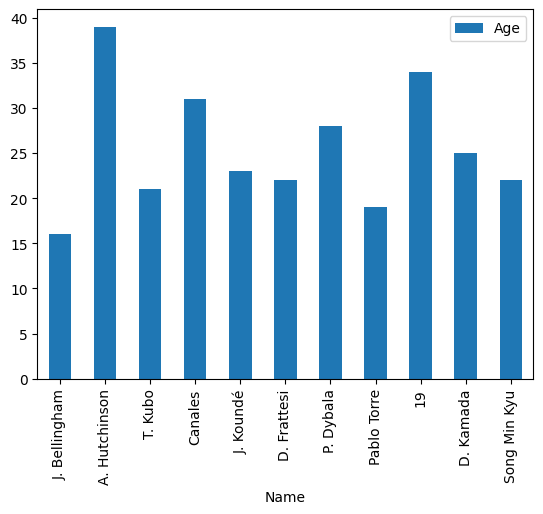

In [216]:
fifa_first_ten = fifa_final.copy()
fifa_first_ten=fifa_first_ten.drop(df.index[11:])
fifa_first_ten.plot(x="Name", y="Age", kind="bar")

### 6)Plot a graph - First 10 player's Name Vs Player's Wage

In [235]:
fifa_first_ten = fifa_final.copy()

In [236]:
df = fifa_first_ten['Wage'].str.replace(r'\D+', '', regex=True)

In [237]:
fifa_first_ten['Temp Wage'] = df

In [238]:
fifa_first_ten['Temp Wage'] = fifa_first_ten['Temp Wage'].astype(str).astype(int)

In [239]:
fifa_first_ten.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [244]:
fifa_first_ten.reset_index(inplace=True)

In [250]:
fifa_first_ten.drop(['index','level_0','Image_link','Age','POT','OVA','Team','Duration','Value','Total_stats'], axis=1, inplace=True)

In [251]:
fifa_first_ten

,Name,Temp Wage
0,M. Solomon,900
1,A. Kamara,800
2,A. Alvarado,800
3,22,800
4,M. Mudryk,750
...,...,...
573,L. Chávez,0
574,H. Ahmed,0
575,C. Montes,0
576,E. Atuesta,0


In [252]:
fifa_first_ten.rename(columns = {'Temp Wage':'Wage'}, inplace = True)

In [254]:
fifa_first_ten=fifa_first_ten.drop(df.index[11:])

<AxesSubplot: xlabel='Name'>

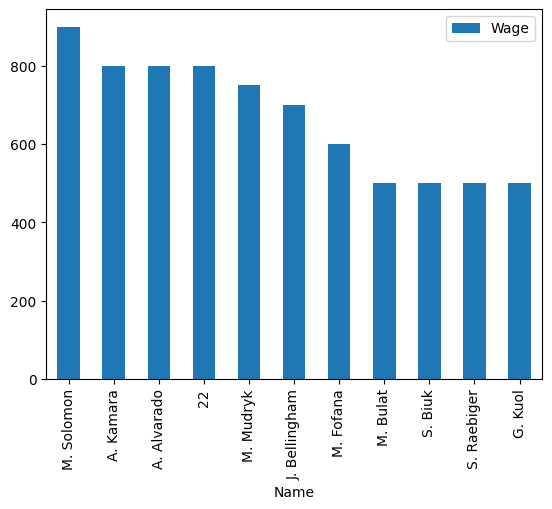

In [255]:
fifa_first_ten.plot(x="Name", y="Wage", kind="bar")

### 7)Find the Player(s) whose potential is more than 90

In [267]:
fifa_highpotential = fifa_final.copy()

In [268]:
fifa_highpotential.loc[fifa_highpotential['POT'] > 90, 'HigherPOT'] = 'True'

In [269]:
fifa_highpotential = fifa_highpotential.dropna()

In [270]:
fifa_highpotential.reset_index(inplace=True)

In [271]:
fifa_highpotential.drop(['index', 'Image_link','HigherPOT','Age','OVA','Team','Wage','Duration','Value','Total_stats'], axis=1, inplace=True)

In [272]:
fifa_highpotential

,Name,POT
0,Pedri,92
1,J. Bellingham,91
2,F. Wirtz,91
3,K. Mbappé,95
4,K. Benzema,91
5,Rúben Dias,91
6,Vinícius Jr.,92
7,J. Musiala,91
8,F. de Jong,92
9,L. Messi,91
